# Table of Content
# 1.0 Introduction
# 2.0 Importing the data files
# 3.0 Data Description
# 4.0 Cleaning of data
# 5.0 Data Preprocessing
# 6.0 Applying Bag words on Data
# 7.0 Applying Naive Baye on Data
# 8.0 Applying  Passive Aggressive Classifier Algorithm on Data
# 9.0 Conclusion

# 1.0 Intoduction

In the modern digital age, incorrect data and disinformation are spreading quickly through social media platforms and other online channels, raising concerns about fake news. This has caused people to lose faith in news organizations and has the potential to seriously damage both individuals and society at large. The process of identifying and identifying possible fake news stories before they go viral involves using data analysis and machine learning algorithms. The veracity of the news story can be accurately predicted by using fake news prediction models, which examine a variety of aspects of the news story, including the language used, the source, and the substance.

The goal of fake news prediction is to provide individuals and organizations with the tools they need to distinguish between genuine and fake news, and to help prevent the spread of misinformation in the digital world.

#### In this project, we must determine whether a specific piece of news is fake or not.


# 2.0 Importing the data files

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\USER\Desktop\2.train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# 3.0 Data Description

In [4]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [5]:
# no of rows and columns
df.shape

(20800, 5)

In [6]:
# missing values in the data
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
## drop your missing values
df.dropna(inplace=True)

In [8]:
df.shape

(18285, 5)

# 4.0 Cleaning of data

In [9]:
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature])

In [10]:
#df.dtypes

In [11]:
df['label']=df['label'].astype(str)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

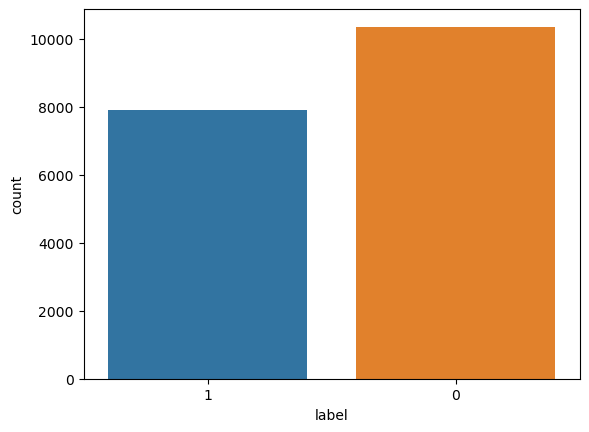

In [12]:
create_distribution('label')

Here, you will figureout it's ratio is almost in the form of 4:5. Its not a codition of imbalance. It means the data doesnot follow imbalace intitution.
This is what we need for our machine learning model.

In [13]:
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


Here, you will figure out that ID 6, ID 8 and lot of ID's are missing in the above data. 
Let's create a new data frame called 'messages'

In [14]:
messages=df.copy()

I'm going to reset index, because in above we can check, when we drop rows with missing values, row 6 and 8 get deleted.
So, we have to reset the index.

In [15]:
#why to rset_index,bcz in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order , we have to use reset_index

messages.reset_index(inplace=True)

In [16]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [17]:
messages.drop(['index','id'],axis=1,inplace=True)

In [18]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# 5.0 Preprocesssing of data

I have to do alot of text preprocessing and stemming on the title feature.

Note, we will consider only title for pre-processing because it plays a very important role as an independent feature in building a model. You will figure out that it's a text-data and my machinelearning is all about mathematics, and mathematics only understand numbers, it doesnot understand text data.

It means i have to convert this text data into numbers, that is where I will use the  NLP techniques.
But before applying NLP techniques, i have to make radio data for the NLP purpose and that is where my text preprocessing technique is going to play a very important role and then perform stemming on the data

#### Now, for the first row;

In [19]:
data=messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

### Data Preprocessing

In [20]:
import re

In [21]:
re.sub('[^a-zA-Z]',' ', data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [22]:
data=data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

Now, i want to convert this text data into a list

In [23]:
list=data.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [24]:
!pip install nltk


In [25]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [26]:
ps=PorterStemmer()

So, i want to perform stemming on each and every words on the list

In [27]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

OR

In [28]:
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

Now, i have to join the list;

In [29]:
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

lets do same task for each & every row in the entire data frame

In [30]:
corpus=[]
sentences=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [31]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [32]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [33]:
len(corpus)

18285

# 6.0 Applying Bag of words on data

I'll now use NLP techniques (Bag of words) to data to obtain the best 20 features.

In [34]:
## Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

In [35]:
## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words

cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [36]:
X=cv.fit_transform(corpus).toarray()

In [37]:
X.shape
#ie we get 5000 features now

(18285, 5000)

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
cv.get_feature_names()[0:20]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [40]:
messages.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [41]:
y=messages['label']

In [42]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [44]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
X_test.shape

(4572, 5000)

# 7.0 Applying Naive Bayes on data

In this session, I'll use Naive Bayes to analyze data and make predictions about test data.

###  MultinomialNB Algo

In [46]:
#this algo works well with text data

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [47]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [48]:
pred=classifier.predict(X_test)
pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

#### Now, i want to check the accuracy of my model

In [49]:
from sklearn import metrics

In [50]:
metrics.accuracy_score(y_test,pred)

0.8904199475065617

In [51]:
cm=metrics.confusion_matrix(y_test,pred)
cm

array([[2301,  299],
       [ 202, 1770]], dtype=int64)

#### Now, i've to make this confusing matrix for userfriendly, in form of visualization 

In [52]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.axis.YTick at 0x1cc02f3fd60>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

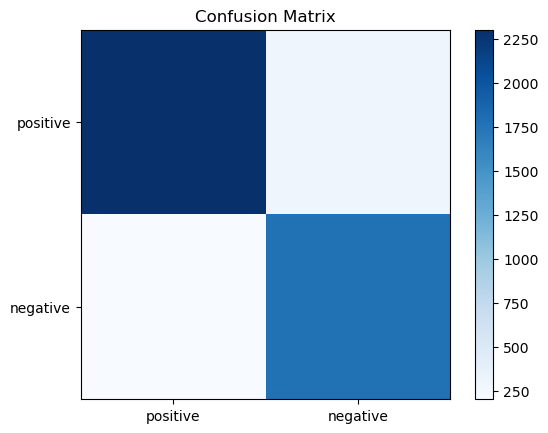

In [53]:
### make your confusion amtrix more user-friendly

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

#### OR

In [54]:
labels=['positive','negative']
np.arange(len(labels))

array([0, 1])

In [55]:
def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

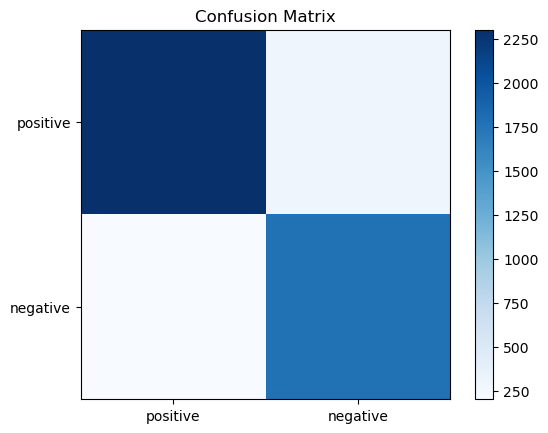

In [56]:
plot_confusion_matrix(cm)

# 8.0 Applying  Passive Aggressive Classifier Algorithm on Data

This lesson will involve applying a passive aggressive classifier to data to identify my most fictitious words.

This algo works well with text data and is basically used for text data

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [58]:
linear_clf=PassiveAggressiveClassifier()

In [59]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [60]:
predictions=linear_clf.predict(X_test)

#### I have to predict the accuracy of this algorithm

In [61]:
metrics.accuracy_score(y_test,predictions)

0.9081364829396326

In [62]:
cm2=metrics.confusion_matrix(y_test,predictions)
cm2

array([[2376,  224],
       [ 196, 1776]], dtype=int64)

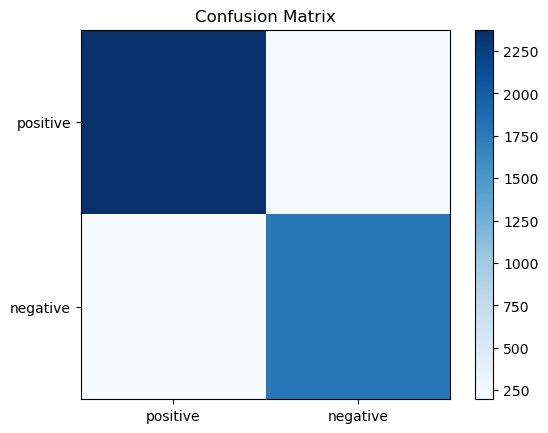

In [63]:
plot_confusion_matrix(cm2)

#### Get Features names and to detect which fake and which is most real word

In [64]:
## Get Features names
#to detect which fake and which is most real word

feature_names=cv.get_feature_names()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Most negative value is most fake word,if we go towards lower value in -ve,ie we have most fake value

In [65]:
#most negative value is most fake word,if we go towards lower value in -ve,ie we have most fake value
classifier.coef_[0]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
        -8.72706912,  -9.4202163 ])

#### Most 20 real values

In [66]:
### Most 20 real values
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]

[(-3.9648951809317863, 'trump'),
 (-4.272721819476034, 'hillari'),
 (-4.368759007672977, 'clinton'),
 (-4.861090048802803, 'elect'),
 (-5.219261999009128, 'new'),
 (-5.230561554263062, 'comment'),
 (-5.269176390390841, 'video'),
 (-5.355472203843678, 'war'),
 (-5.372788653855138, 'hillari clinton'),
 (-5.394864605554338, 'us'),
 (-5.412883111057016, 'fbi'),
 (-5.483500678270969, 'vote'),
 (-5.483500678270969, 'email'),
 (-5.559486585248892, 'obama'),
 (-5.570068694579429, 'world'),
 (-5.718914322176994, 'donald'),
 (-5.743915624382411, 'donald trump'),
 (-5.8229040357010415, 'russia'),
 (-5.864868234800074, 'presid'),
 (-5.872036724278686, 'america')]

# 9.0 Conclusion

In conclusion, fake news prediction is a valuable tool for combating the spread of misinformation and promoting a more informed public discourse. Through the use of powerful machine learning algorithms and careful feature selection, fake news prediction models can help to protect individuals and society from the harmful effects of fake news.